# K-means Clustering of the FiveThirtyEight College Majors Dataset

https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/recent-grads.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
# Look at how many missing values are in this dataset:
print("Missing Values:")
print(data.isnull().sum())

# The number of missing values is very small in each feature, so we do not need
# to worrying about removing features containing to many NAs. Instead, we directly
# dropped those few NA values which won't affect the general result
data_cleaned = data.dropna()

print("Cleaned Dataset:")
print(data_cleaned.head())

print("Summary Statistics of Cleaned Data:")
print(data_cleaned.describe())

Missing Values:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
Cleaned Dataset:
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405              

In [ ]:
data_cleaned

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


# Feature Engineering

In [ ]:
# Features to keep: Major, Major_category, Median, Employed (in rate), College_jobs (in rate),
# Low_wage_jobs (in rate), Full_time (in rate), Part_time (in rate), and unemployment_rate
new_features = data_cleaned[['Major', 'Major_category', 'Median', 'Unemployment_rate']]

features_to_rate = list(['Employed', 'College_jobs','Low_wage_jobs','Full_time','Part_time'])

for feature in features_to_rate:
  new_features[feature+'_rate'] = data_cleaned[feature] / data_cleaned['Total']

new_features = new_features.dropna()

<ipython-input-324-95ed4d2ced87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_features[feature+'_rate'] = data_cleaned[feature] / data_cleaned['Total']
<ipython-input-324-95ed4d2ced87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_features[feature+'_rate'] = data_cleaned[feature] / data_cleaned['Total']
<ipython-input-324-95ed4d2ced87>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
new_features

,Major,Major_category,Median,Unemployment_rate,Employed_rate,College_jobs_rate,Low_wage_jobs_rate,Full_time_rate,Part_time_rate
0,PETROLEUM ENGINEERING,Engineering,110000,0.018381,0.844805,0.655836,0.082514,0.790509,0.115434
1,MINING AND MINERAL ENGINEERING,Engineering,75000,0.117241,0.846561,0.462963,0.066138,0.735450,0.224868
2,METALLURGICAL ENGINEERING,Engineering,73000,0.024096,0.757009,0.532710,0.000000,0.651869,0.155374
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,0.050125,0.602544,0.420509,0.000000,0.849762,0.119237
4,CHEMICAL ENGINEERING,Engineering,65000,0.061098,0.796466,0.567700,0.030130,0.718227,0.160570
...,...,...,...,...,...,...,...,...,...
168,ZOOLOGY,Biology & Life Science,26000,0.046320,0.744322,0.329528,0.088358,0.599715,0.260435
169,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,25000,0.065112,0.744569,0.521374,0.028732,0.647512,0.200420
170,CLINICAL PSYCHOLOGY,Psychology & Social Work,25000,0.149048,0.740310,0.347428,0.219168,0.607470,0.228330
171,COUNSELING PSYCHOLOGY,Psychology & Social Work,23400,0.053621,0.816472,0.519455,0.066580,0.681799,0.208604


# Baseline/Reference Model Training

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

features_train, features_test = train_test_split(new_features, test_size=0.2, random_state=42)

In [ ]:
# Design the baseline model that predict the probabilty of being an engineering
# major solely based on the median salary

# Split the median values equally into three groups: low, middle, and high
# Determine bin edges to split the values equally into 3 categories using percentiles
bin_edges = np.percentile(features_train['Median'], [0, 33.33, 66.67, 100])
features_train['Group'] = pd.cut(features_train['Median'], bins=bin_edges,
                                 labels=['Low', 'Middle', 'High'], include_lowest=True)

In [ ]:
# Construct the probability vector for each major category in each salary group as the model output

# First get all unique major categories
major_cat = new_features['Major_category'].unique()

# For each cluster create a dictionary with category names as the key
group1_dic = {cat: 0 for cat in major_cat}
group2_dic = {cat: 0 for cat in major_cat}
group3_dic = {cat: 0 for cat in major_cat}

# Compute the probability of each major category in each cluster
temp_data = features_train[features_train['Group'] == 'Low']
cat_prob1 = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Group'] == 'Middle']
cat_prob2_baseline = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Group'] == 'High']
cat_prob3_baseline = temp_data['Major_category'].value_counts(normalize=True)

# Set the adjusting parameter epsilon
epsilon = 0.001

# Update the dictionary with probability values take into account the missing categories
for key in group1_dic:
  if key in cat_prob1_baseline.index:
    # update the probability by adding the calculated probability in cluster n
    group1_dic[key] += cat_prob1_baseline[key]
  else:
    # set the category probability to epsilon
    group1_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group1_dic:
      if key in cat_prob1_baseline.index:
        group1_dic[key] -= epsilon / len(cat_prob1_baseline)

# Repeat of cluster 2
for key in group2_dic:
  if key in cat_prob2_baseline.index:
    # update the probability by adding the calculated probability in cluster n
    group2_dic[key] += cat_prob2_baseline[key]
  else:
    # set the category probability to epsilon
    group2_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group2_dic:
      if key in cat_prob2_baseline.index:
        group2_dic[key] -= epsilon / len(cat_prob2_baseline)

# Repeat of cluster 3
for key in group3_dic:
  if key in cat_prob3_baseline.index:
    # update the probability by adding the calculated probability in cluster n
    group3_dic[key] += cat_prob3_baseline[key]
  else:
    # set the category probability to epsilon
    group3_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group3_dic:
      if key in cat_prob3_baseline.index:
        group3_dic[key] -= epsilon / len(cat_prob3_baseline)

In [ ]:
# Sort the dictionaries by major category order alphabetically
group1_dic = dict(sorted(group1_dic.items()))
group2_dic = dict(sorted(group2_dic.items()))
group3_dic = dict(sorted(group3_dic.items()))

# Create a dataframe to store the probability info
baseline_model = pd.DataFrame({'Major_Category': group1_dic.keys(), 'Low Income': group1_dic.values(),
                                  'Middle Income': group2_dic.values(), 'High Income': group3_dic.values()})

In [ ]:
baseline_model

,Major_Category,Low Income,Middle Income,High Income
0,Agriculture & Natural Resources,0.042878,0.125000,0.001000
1,Arts,0.042878,0.020833,0.001000
2,Biology & Life Science,0.086357,0.145833,0.045912
3,Business,0.021139,0.062500,0.138935
4,Communications & Journalism,0.001000,0.062500,0.001000
5,Computers & Mathematics,0.001000,0.041667,0.162191
6,Education,0.282009,0.020833,0.022656
7,Engineering,0.001000,0.062500,0.418005
8,Health,0.108096,0.083333,0.069167
9,Humanities & Liberal Arts,0.195052,0.041667,0.001000


# Baseline Model Testing

In [ ]:
# Use the same median salary cutoff bins from the training model in the testing model
features_test['Group'] = pd.cut(features_test['Median'], bins=bin_edges,
                                labels=['Low', 'Middle', 'High'], include_lowest=True)

# Now, compute the probability for each major category in each salary group for the testing data

# For each cluster create a dictionary with category names as the key
group1_dic_test = {cat: 0 for cat in major_cat}
group2_dic_test = {cat: 0 for cat in major_cat}
group3_dic_test = {cat: 0 for cat in major_cat}

# Compute the probability of each major category in each cluster
temp_data = features_train[features_train['Group'] == 'Low']
cat_prob1_baseline_test = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Group'] == 'Middle']
cat_prob2_baseline_test = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Group'] == 'High']
cat_prob3_baseline_test = temp_data['Major_category'].value_counts(normalize=True)

# Set the adjusting parameter epsilon
epsilon = 0.001

# Update the dictionary with probability values take into account the missing categories
for key in group1_dic_test:
  if key in cat_prob1_baseline_test.index:
    # update the probability by adding the calculated probability in cluster n
    group1_dic_test[key] += cat_prob1_baseline_test[key]
  else:
    # set the category probability to epsilon
    group1_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group1_dic_test:
      if key in cat_prob1_baseline_test.index:
        group1_dic_test[key] -= epsilon / len(cat_prob1_baseline_test)

# Repeat of cluster 2
for key in group2_dic_test:
  if key in cat_prob2_baseline_test.index:
    # update the probability by adding the calculated probability in cluster n
    group2_dic_test[key] += cat_prob2_baseline_test[key]
  else:
    # set the category probability to epsilon
    group2_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group2_dic_test:
      if key in cat_prob2_baseline_test.index:
        group2_dic_test[key] -= epsilon / len(cat_prob2_baseline_test)

# Repeat of cluster 3
for key in group3_dic_test:
  if key in cat_prob3_baseline_test.index:
    # update the probability by adding the calculated probability in cluster n
    group3_dic_test[key] += cat_prob3_baseline_test[key]
  else:
    # set the category probability to epsilon
    group3_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in group3_dic_test:
      if key in cat_prob3_baseline_test.index:
        group3_dic_test[key] -= epsilon / len(cat_prob3_baseline_test)

In [ ]:
# Sort the dictionaries by major category order alphabetically
group1_dic_test = dict(sorted(group1_dic_test.items()))
group2_dic_test = dict(sorted(group2_dic_test.items()))
group3_dic_test = dict(sorted(group3_dic_test.items()))

# Create a dataframe to store the probability info
baseline_test = pd.DataFrame({'Major_Category': group1_dic_test.keys(), 'Low Income': group1_dic_test.values(),
                                  'Middle Income': group2_dic_test.values(), 'High Income': group3_dic_test.values()})

In [ ]:
baseline_test

,Major_Category,Low Income,Middle Income,High Income
0,Agriculture & Natural Resources,0.042878,0.125000,0.001000
1,Arts,0.042878,0.020833,0.001000
2,Biology & Life Science,0.086357,0.145833,0.045912
3,Business,0.021139,0.062500,0.138935
4,Communications & Journalism,0.001000,0.062500,0.001000
5,Computers & Mathematics,0.001000,0.041667,0.162191
6,Education,0.282009,0.020833,0.022656
7,Engineering,0.001000,0.062500,0.418005
8,Health,0.108096,0.083333,0.069167
9,Humanities & Liberal Arts,0.195052,0.041667,0.001000


In [ ]:
# Evaluation of baseline model effectiveness: Calculate the loss function
# Use the same loss function as logistic regression
import numpy as np

# Create a dictionary to store the loss function for each salary group
baseline_loss_func = {"Group1":0,"Group2":0,"Group3":0}
# Compute the loss functions
for i in range(1,4):
  true_prob = baseline_model.iloc[:,i] * np.log(baseline_test.iloc[:,i])
  false_prob = (1-baseline_model.iloc[:,i]) * np.log(1-baseline_test.iloc[:,i])
  temp_loss = -sum(true_prob + false_prob) / baseline_model.shape[0]
  baseline_loss_func["Group"+str(i)] = temp_loss

In [ ]:
baseline_loss_func

{'Group1': 0.18554673628448431,
 'Group2': 0.22296134659779954,
 'Group3': 0.1684662390158079}

# K-Means Model Training

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

features_train, features_test = train_test_split(new_features, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

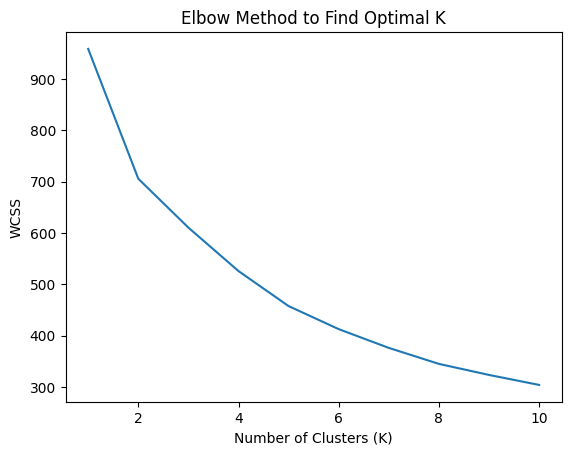

In [ ]:
# Scale the features and run kMeans algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_train.iloc[:, 2:])

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [ ]:
# Train the K-means model
k = 3  # You can adjust this based on your elbow method analysis
kmeans = KMeans(n_clusters=k, random_state=42)
features_train['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_data = pd.DataFrame(cluster_centers, columns=features_train.columns[2:-1])
features_train['Cluster'] = features_train['Cluster'] + 1  # Start cluster numbering from 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

# evaluate clustering
inertia = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center, the lower the better
print("Inertia:", inertia)
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels) # Silhouette Coefficient, the higher the better (Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation))
print("Silhouette Score:", silhouette_avg)

Inertia: 610.6017326534325
Silhouette Score: 0.2362783259954156


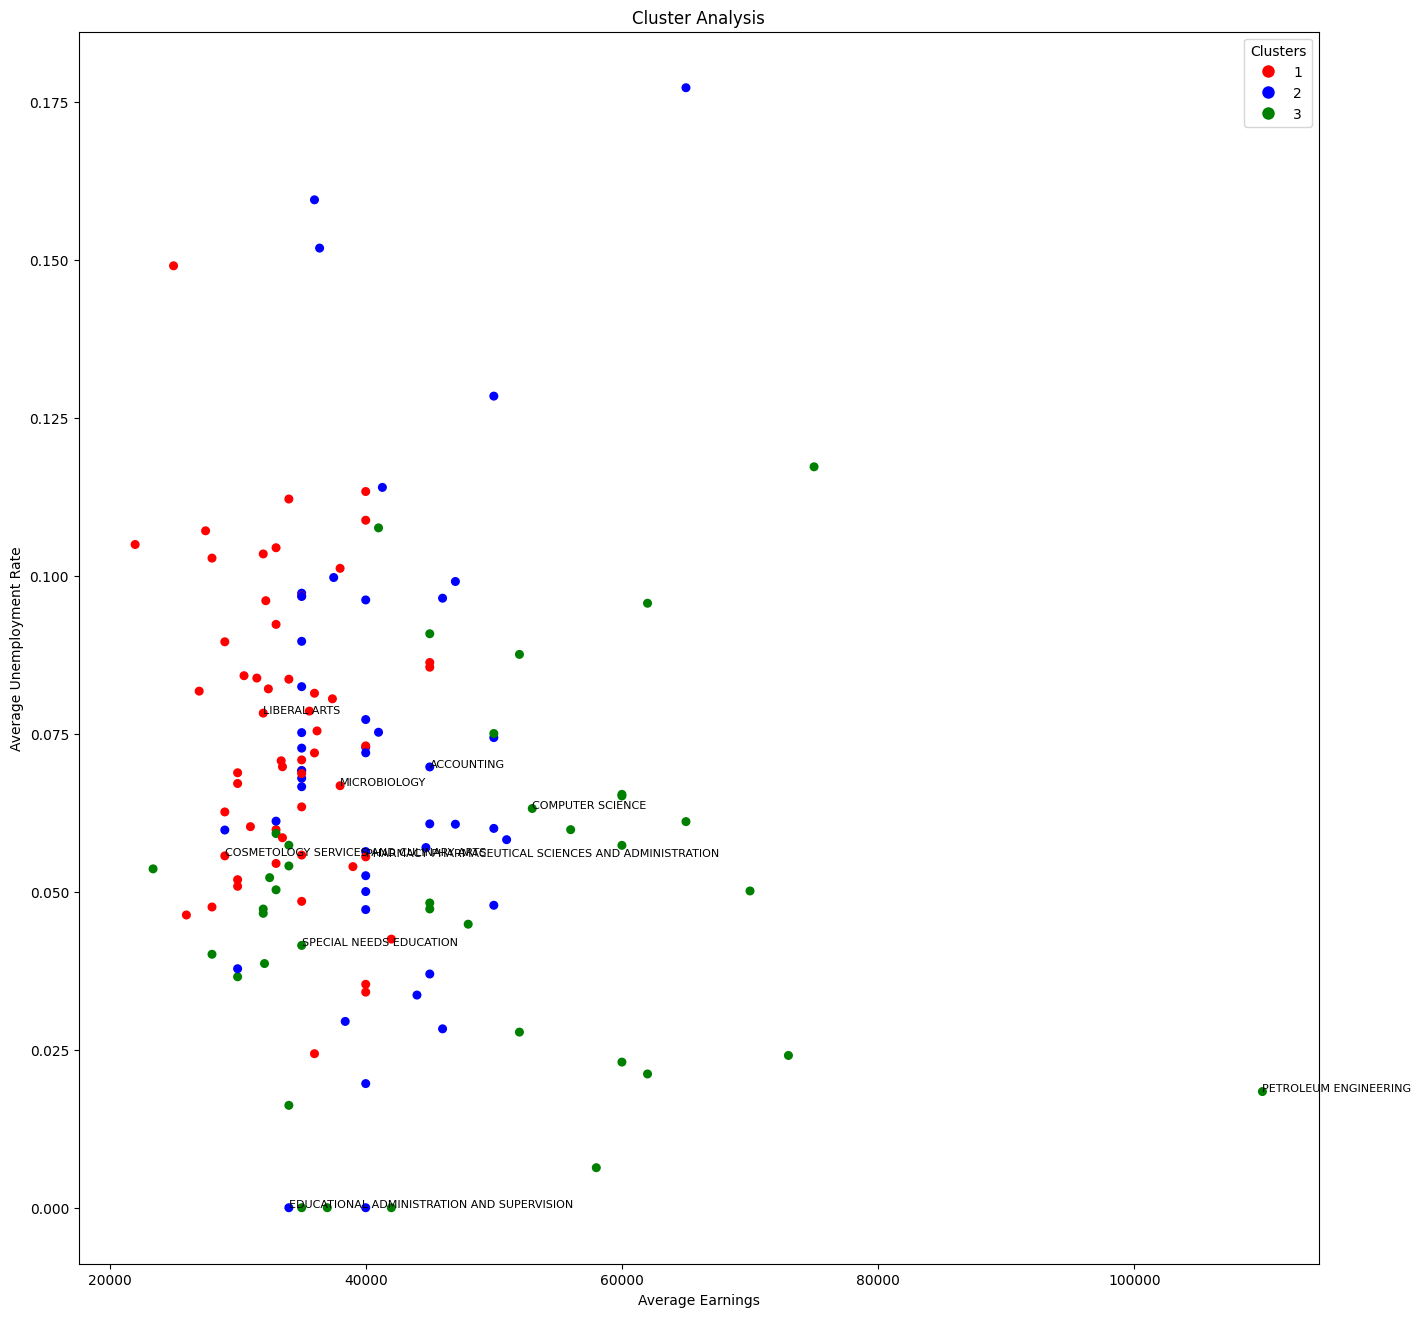

<ipython-input-339-32a9e519b6e4>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = features_train.groupby('Cluster').mean()


In [ ]:
# Plot the clusters

cluster_colors = {
    1: 'red',
    2: 'blue',
    3: 'green'
}


# Visualize the clusters (example for two features)
plt.figure(figsize=(16, 16))  # We can change the figure size
scatter = plt.scatter(features_train['Median'], features_train['Unemployment_rate'], c=features_train['Cluster'].map(cluster_colors), s=30)

plt.xlabel('Average Earnings')
plt.ylabel('Average Unemployment Rate')
plt.title('Cluster Analysis')

for i, row in new_features.iterrows():
    if i % 20 == 0:  # To avoid clutter, annotate every 20th point
      plt.annotate(row['Major'], (row['Median'], row['Unemployment_rate']), fontsize=8)

cluster_names = ['Cluster A', 'Cluster B', 'Cluster C']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) for name, color in cluster_colors.items()]
plt.legend(handles=legend_elements, title='Clusters', fontsize=10)

plt.show()

cluster_stats = features_train.groupby('Cluster').mean()

best_clusters = cluster_stats.sort_values(by=['Median', 'Unemployment_rate'], ascending=[False, True])

# Get the top N clusters with the best career prospects
n_top_clusters = 2
top_clusters = best_clusters.head(n_top_clusters)

# Find the majors within the top clusters
best_majors = features_train[features_train['Cluster'].isin(top_clusters.index)].sort_values(by=['Median', 'Unemployment_rate'], ascending=[False, True])


In [ ]:
top_clusters

,Median,Unemployment_rate,Employed_rate,College_jobs_rate,Low_wage_jobs_rate,Full_time_rate,Part_time_rate
Cluster,,,,,,,
3,48131.578947,0.048707,0.824255,0.579086,0.053114,0.716768,0.188764
2,40847.727273,0.071342,0.806941,0.236757,0.076817,0.756608,0.163263


In [ ]:
best_majors

,Major,Major_category,Median,Unemployment_rate,Employed_rate,College_jobs_rate,Low_wage_jobs_rate,Full_time_rate,Part_time_rate,Cluster
0,PETROLEUM ENGINEERING,Engineering,110000,0.018381,0.844805,0.655836,0.082514,0.790509,0.115434,3
1,MINING AND MINERAL ENGINEERING,Engineering,75000,0.117241,0.846561,0.462963,0.066138,0.735450,0.224868,3
2,METALLURGICAL ENGINEERING,Engineering,73000,0.024096,0.757009,0.532710,0.000000,0.651869,0.155374,3
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,0.050125,0.602544,0.420509,0.000000,0.849762,0.119237,3
4,CHEMICAL ENGINEERING,Engineering,65000,0.061098,0.796466,0.567700,0.030130,0.718227,0.160570,3
...,...,...,...,...,...,...,...,...,...,...
154,TEACHER EDUCATION: MULTIPLE LEVELS,Education,30000,0.036546,0.905352,0.745413,0.049990,0.812435,0.153292,3
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,Psychology & Social Work,30000,0.037819,0.884788,0.307019,0.077235,0.688607,0.256561,2
161,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,29000,0.059767,0.866935,0.324597,0.020833,0.737903,0.225134,2
164,EARLY CHILDHOOD EDUCATION,Education,28000,0.040105,0.865971,0.625582,0.076299,0.733433,0.186251,3


In [ ]:
# Construct the probability vector for each major category in each cluster as the output

# First get all unique major categories
major_cat = new_features['Major_category'].unique()

# For each cluster create a dictionary with category names as the key
cluster1_dic = {cat: 0 for cat in major_cat}
cluster2_dic = {cat: 0 for cat in major_cat}
cluster3_dic = {cat: 0 for cat in major_cat}

# Compute the probability of each major category in each cluster
temp_data = features_train[features_train['Cluster'] == 1]
cat_prob1 = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Cluster'] == 2]
cat_prob2 = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_train[features_train['Cluster'] == 3]
cat_prob3 = temp_data['Major_category'].value_counts(normalize=True)

# Set the adjusting parameter epsilon
epsilon = 0.001

# Update the dictionary with probability values take into account the missing categories
for key in cluster1_dic:
  if key in cat_prob1.index:
    # update the probability by adding the calculated probability in cluster n
    cluster1_dic[key] += cat_prob1[key]
  else:
    # set the category probability to epsilon
    cluster1_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster1_dic:
      if key in cat_prob1.index:
        cluster1_dic[key] -= epsilon / len(cat_prob1)

# Repeat of cluster 2
for key in cluster2_dic:
  if key in cat_prob2.index:
    # update the probability by adding the calculated probability in cluster n
    cluster2_dic[key] += cat_prob2[key]
  else:
    # set the category probability to epsilon
    cluster2_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster2_dic:
      if key in cat_prob2.index:
        cluster2_dic[key] -= epsilon / len(cat_prob2)

# Repeat of cluster 3
for key in cluster3_dic:
  if key in cat_prob3.index:
    # update the probability by adding the calculated probability in cluster n
    cluster3_dic[key] += cat_prob3[key]
  else:
    # set the category probability to epsilon
    cluster3_dic[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster3_dic:
      if key in cat_prob3.index:
        cluster3_dic[key] -= epsilon / len(cat_prob3)

In [ ]:
# Sort the dictionaries by major category order alphabetically
cluster1_dic = dict(sorted(cluster1_dic.items()))
cluster2_dic = dict(sorted(cluster2_dic.items()))
cluster3_dic = dict(sorted(cluster3_dic.items()))

# Create a dataframe to store the probability info
probability_model = pd.DataFrame({'Major_Category': cluster1_dic.keys(), 'Cluster1': cluster1_dic.values(),
                                  'Cluster2': cluster2_dic.values(), 'Cluster3': cluster3_dic.values()})

In [ ]:
probability_model

,Major_Category,Cluster1,Cluster2,Cluster3
0,Agriculture & Natural Resources,0.018039,0.136221,0.025538
1,Arts,0.054403,0.001000,0.001000
2,Biology & Life Science,0.199857,0.022584,0.025538
3,Business,0.001000,0.204403,0.025538
4,Communications & Journalism,0.001000,0.068039,0.001000
5,Computers & Mathematics,0.018039,0.090766,0.104485
6,Education,0.018039,0.022584,0.341327
7,Engineering,0.018039,0.136221,0.367643
8,Health,0.163494,0.045312,0.025538
9,Humanities & Liberal Arts,0.181675,0.022584,0.001000


# K-Means Model Testing

In [ ]:
# Use the kmean model trained to predict the testing features
scaler_test = StandardScaler()
scaled_features_test = scaler_test.fit_transform(features_test.iloc[:, 2:])
features_test['Cluster'] = kmeans.predict(scaled_features_test)
features_test['Cluster'] = features_test['Cluster'] + 1

In [ ]:
features_test

,Major,Major_category,Median,Unemployment_rate,Employed_rate,College_jobs_rate,Low_wage_jobs_rate,Full_time_rate,Part_time_rate,Cluster
77,MARKETING AND MARKETING RESEARCH,Business,38000,0.061215,0.871600,0.123385,0.136289,0.763448,0.174596,2
139,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,Industrial Arts & Consumer Services,32000,0.051467,0.824136,0.220517,0.134624,0.619058,0.307938,1
153,VISUAL AND PERFORMING ARTS,Arts,30000,0.102197,0.792000,0.236862,0.174769,0.519815,0.384800,1
61,MOLECULAR BIOLOGY,Biology & Life Science,40000,0.084361,0.632842,0.394809,0.063825,0.515902,0.250820,1
157,HUMANITIES,Humanities & Liberal Arts,30000,0.068584,0.759471,0.175586,0.171527,0.535929,0.334486,1
166,DRAMA AND THEATER ARTS,Arts,27000,0.077541,0.836204,0.161715,0.255913,0.581447,0.369812,1
86,HUMAN RESOURCES AND PERSONNEL MANAGEMENT,Business,36000,0.059570,0.847451,0.098216,0.077805,0.757236,0.153774,2
143,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,32000,0.045455,0.889159,0.281688,0.165992,0.781823,0.168015,2
115,FRENCH GERMAN LATIN AND OTHER COMMON FOREIGN L...,Humanities & Liberal Arts,34000,0.075566,0.794159,0.311964,0.109170,0.608133,0.301973,1
32,MISCELLANEOUS FINE ARTS,Arts,50000,0.089375,0.872455,0.207485,0.226048,0.613473,0.319461,1


In [ ]:
# Construct the output of Kmeans for the test cases

# For each cluster create a dictionary with category names as the key
cluster1_dic_test = {cat: 0 for cat in major_cat}
cluster2_dic_test = {cat: 0 for cat in major_cat}
cluster3_dic_test = {cat: 0 for cat in major_cat}

# Compute the probability of each major category in each cluster
temp_data = features_test[features_test['Cluster'] == 1]
cat_prob1_test = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_test[features_test['Cluster'] == 2]
cat_prob2_test = temp_data['Major_category'].value_counts(normalize=True)
temp_data = features_test[features_test['Cluster'] == 3]
cat_prob3_test = temp_data['Major_category'].value_counts(normalize=True)

# Update the dictionary with probability values take into account the missing categories
for key in cluster1_dic_test:
  if key in cat_prob1_test.index:
    # update the probability by adding the calculated probability in cluster n
    cluster1_dic_test[key] += cat_prob1_test[key]
  else:
    # set the category probability to epsilon
    cluster1_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster1_dic_test:
      if key in cat_prob1_test.index:
        cluster1_dic_test[key] -= epsilon / len(cat_prob1_test)

# Repeat of cluster 2
for key in cluster2_dic_test:
  if key in cat_prob2_test.index:
    # update the probability by adding the calculated probability in cluster n
    cluster2_dic_test[key] += cat_prob2_test[key]
  else:
    # set the category probability to epsilon
    cluster2_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster2_dic_test:
      if key in cat_prob2_test.index:
        cluster2_dic_test[key] -= epsilon / len(cat_prob2_test)

# Repeat of cluster 3
for key in cluster3_dic_test:
  if key in cat_prob3_test.index:
    # update the probability by adding the calculated probability in cluster n
    cluster3_dic_test[key] += cat_prob3_test[key]
  else:
    # set the category probability to epsilon
    cluster3_dic_test[key] = epsilon
    # and reduce from all existing categories the averaged values of epsilon
    # for example, if a cluster has 14 categories, then each of these 14 categories are reduced by epsilon / 14
    for key in cluster3_dic_test:
      if key in cat_prob3_test.index:
        cluster3_dic_test[key] -= epsilon / len(cat_prob3_test)

In [ ]:
# Sort the dictionaries by major category order alphabetically
cluster1_dic_test = dict(sorted(cluster1_dic_test.items()))
cluster2_dic_test = dict(sorted(cluster2_dic_test.items()))
cluster3_dic_test = dict(sorted(cluster3_dic_test.items()))

# Create a dataframe to store the probability info
probability_test = pd.DataFrame({'Major_Category': cluster1_dic_test.keys(), 'Cluster1': cluster1_dic_test.values(),
                                  'Cluster2': cluster2_dic_test.values(), 'Cluster3': cluster3_dic_test.values()})

In [ ]:
probability_test

,Major_Category,Cluster1,Cluster2,Cluster3
0,Agriculture & Natural Resources,0.001000,0.123333,0.001000
1,Arts,0.355476,0.001000,0.001000
2,Biology & Life Science,0.069762,0.001000,0.001000
3,Business,0.001000,0.373333,0.001000
4,Communications & Journalism,0.001000,0.123333,0.001000
5,Computers & Mathematics,0.069762,0.123333,0.001000
6,Education,0.001000,0.001000,0.074723
7,Engineering,0.001000,0.001000,0.613185
8,Health,0.001000,0.001000,0.001000
9,Humanities & Liberal Arts,0.284048,0.001000,0.001000


In [ ]:
probability_model

,Major_Category,Cluster1,Cluster2,Cluster3
0,Agriculture & Natural Resources,0.018039,0.136221,0.025538
1,Arts,0.054403,0.001000,0.001000
2,Biology & Life Science,0.199857,0.022584,0.025538
3,Business,0.001000,0.204403,0.025538
4,Communications & Journalism,0.001000,0.068039,0.001000
5,Computers & Mathematics,0.018039,0.090766,0.104485
6,Education,0.018039,0.022584,0.341327
7,Engineering,0.018039,0.136221,0.367643
8,Health,0.163494,0.045312,0.025538
9,Humanities & Liberal Arts,0.181675,0.022584,0.001000


In [ ]:
# Evaluation of model effectiveness: Calculate the loss function
# Use the same loss function as logistic regression
import numpy as np

# Create a dictionary to store the loss function for each cluster
loss_func = {"Cluster1":0,"Cluster2":0,"Cluster3":0}
# Compute the loss functions
for i in range(1,4):
  true_prob = probability_model.iloc[:,i] * np.log(probability_test.iloc[:,i])
  false_prob = (1-probability_model.iloc[:,i]) * np.log(1-probability_test.iloc[:,i])
  temp_loss = -sum(true_prob + false_prob) / probability_model.shape[0]
  loss_func["Cluster"+str(i)] = temp_loss

In [ ]:
loss_func

{'Cluster1': 0.3226215105802133,
 'Cluster2': 0.3088446809295177,
 'Cluster3': 0.23083511490668385}

In [ ]:
baseline_loss_func

{'Group1': 0.18554673628448431,
 'Group2': 0.22296134659779954,
 'Group3': 0.1684662390158079}